# **Import Libraries**

Throughtout this project we will use:

* **OpenCV**
* **Dlib**
* **NumPy**
* **Pillow**

In [51]:
import cv2
import dlib
import numpy as np
from PIL import Image

import glob
from IPython.display import display

# **Exctract facial features**

<div align="center">
  <img src="https://pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup.jpg" width=400 height=300>
</div>

With the help of **dlib**, we will extract the facial features of each image, as demonstraded in the picture above. We will use **get_frontal_face_detector** to detect where the face is, and **shape_predictor_68_face_landmarks.dat** to extract the 68 landmarks of the face.

In [23]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def detectFace(img):
    """
    Detect the face present in the image 
    
    Args:
      img (ndarray (width, height, 3)): Image
      
    Returns
        face (dlib_rectangles): Rectangle that delimits the face
    """    
    face = detector(img, 1)
    #or len(face) > 1
    if len(face) == 0:
        return None
    
    return face[0]

In [43]:
images_path = glob.glob("images/*")
img_lst = []

for img_path in images_path:
    img = cv2.imread(img_path)
    face = detectFace(img)

    if face is None:
        print("Couldn't find face in: ", img_path)
    else:
        print(img_path)
        landmarks = predictor(img, face)
        img_lst.append((img, face, landmarks))

images/Donald_Trump.webp
images/Elon_Musk.webp
images/Mark_Zuckerberg.webp


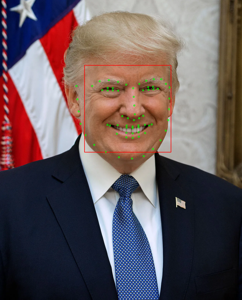

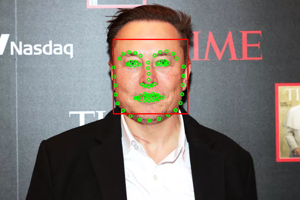

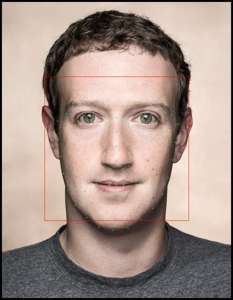

In [56]:
# Demonstration
# Note: OpenCV uses BGR colorscheme
RED = (0, 0, 255)
GREEN = (0, 255, 0)

for img, face, landmarks in img_lst:
    # Draw on the image the face detected
    x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(img, (x1, y1), (x2, y2), RED, 2)

    # Draw a circle for each landmark
    for i in range(68):
        cv2.circle(img, (landmarks.part(i).x, landmarks.part(i).y), 3, GREEN)

    # Convert to RGB, then to PIL and resize 
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(rgb_img)
    pil_img.thumbnail((300, 300))

    display(pil_img)

# **Normalize images**

In drawing, faces can be simplified using the “Rule of Thirds,” which divides the face into horizontal and vertical thirds to help position facial features accurately.<br><br>

**Rule of Thirds:** The face can be divided into three equal horizontal sections. The top third is from the hairline to the eyebrows, the middle third is from the eyebrows to the bottom of the nose, and the bottom third is from the bottom of the nose to the chin. This method helps ensure that facial features are proportionally placed.<br>
**Facial Features Placement:** Eyes are typically positioned halfway between the top of the head and the chin, which aligns with the horizontal third division. The nose line is found in the middle of the eye line and the bottom of the chin, and the mouth line is about one-third of the way down from the nose line to the chin.<br><br>

Since each image has variant size, we need to normalize them, warping each to a 600x600 image. With the drawing rules stated earlier, let's define where certain facial features will warp to:<br><br>

* Left corner of the **left eye**: (180, 200)
* Right corner of the **right eye**: (420, 200)

Now that we know the starting and ending positions, we can use the similarity transform (rotation, translation and scale). To find this transformation, we will use **estimateRigidTransform**, available on the opencv library.

# **Align faces**

Earlier we normalized the images, so now all images have the same size and their eyes are aligned. 